# <font style = "color:rgb(50,120,229)">Implementation of Morphological Operations</font>
We had discussed how to use dilation and erosion operations in the previous section. In this section, we will see what is going on under the hood. The most important concept that you need to understand is the Structuring element. We will discuss about the structuring element and how it is used for performing these morphological operations.

## Assignment Instructions
In this assignment, you will implement erosion and dilation from scratch using Method 2 that was discussed in the previous section. 

The assignment carries 30 marks - 15 marks each for erosion and dilation.

You will get total 5 attempts to complete the assignment.

## Grading Rubric
1. Implement erosion from scratch - 8 marks

2. Display the final (correct) image - 2 marks

3. Create a video of intermediate steps of erosion using VideoWriter - 5 marks

4. Implement dilation from scratch - 8 marks

5. Display the final (correct) image - 2 marks

6. Create a video of intermediate steps of dilation using VideoWriter - 5 marks

## <font style="color:rgb(50,120,229)">Implement Method 2</font>
1. Scan through the image and superimpose the kernel on the neighborhood of each pixel. 
1. Perform an AND operation of the neighborhood with the kernel.
1. Replace the pixel value with the `maximum` value in the neighborhood given by the kernel. 

This means that you check every pixel and its neighborhood with respect to the kernel and change the pixel to white if any of the pixel in this neighborhood is white. OpenCV implements an optimized version of this method. This will work even if the image is not a binary image.

## <font style="color:rgb(50,120,229)">Import Libraries </font>

In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Create a Demo Image</font>
## <font style="color:rgb(50,120,229)">Create an empty matrix </font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


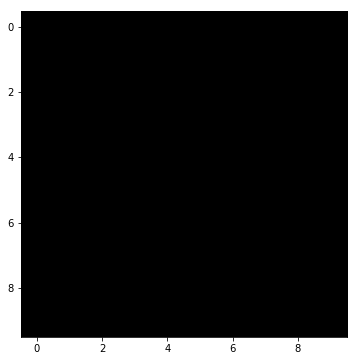

In [3]:
im = np.zeros((10,10),dtype='uint8')
print(im);
plt.imshow(im)

## <font style="color:rgb(50,120,229)">Lets add some white blobs</font>

We have added the blobs at different places so that all boundary cases are covered in this example.

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


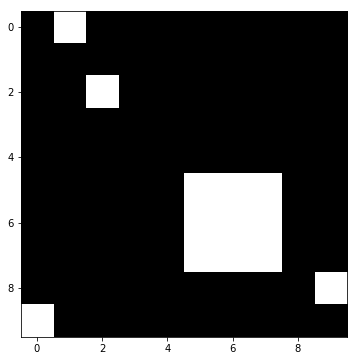

In [4]:
im[0,1] = 1
im[-1,0]= 1
im[-2,-1]=1
im[2,2] = 1
im[5:8,5:8] = 1

print(im)
plt.imshow(im)

This becomes our demo Image for illustration purpose

## <font style="color:rgb(50,120,229)">Create an Ellipse Structuring Element </font>
Let us create a 3x3 ellipse structuring element.

In [5]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
print(element)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [8]:
ksize = element.shape[0]

3

In [45]:
height,width = im.shape[:2]

## <font style="color:rgb(50,120,229)">First check the correct output using cv2.dilate</font>

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


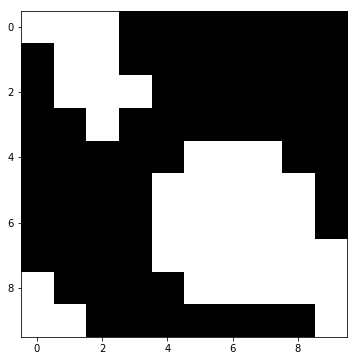

In [10]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)

## <font style="color:rgb(50,120,229)">Write Code for Dilation from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`dilationScratch.avi`** and display it using markdown below:

**`dilationScratch.avi` will come here**

```<video width="320" height="240" controls>
  <source src="dilationScratch.avi" type="video/mp4">
</video>```

**Note**

1. Use FPS as 10
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

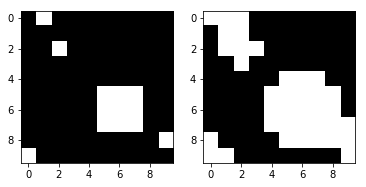

In [11]:
plt.subplot(121);plt.imshow(im)
plt.subplot(122);plt.imshow(dilatedEllipseKernel)

In [93]:
border = ksize//2
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
paddedDilatedIm = paddedIm.copy()

# Create a VideoWriter object
outavi = cv2.VideoWriter('dilationScratch.avi', cv2.VideoWriter_fourcc(
    'M', 'J', 'P', 'G'), 10, (50, 50))

for h_i in range(border, height+border):
    for w_i in range(border,width+border):
        if im[h_i-border, w_i-border]:
            paddedDilatedIm[h_i-border : (h_i+border)+1, w_i-border : (w_i+border)+1] = \
                cv2.bitwise_or(paddedDilatedIm[h_i-border : (h_i+border)+1, w_i-border : (w_i+border+1)], element)

        
            # Resize output to 50x50 before writing it to the video
            paddedDilatedResizeIm = cv2.resize(paddedDilatedIm, (50,50),
                                              interpolation=cv2.INTER_LINEAR_EXACT)

            # Convert resizedFrame to BGR before writing
            paddedDilatedResizeIm = paddedDilatedResizeIm*255
            paddedDilatedResizeIm = cv2.cvtColor(paddedDilatedResizeIm,
                                                 cv2.COLOR_GRAY2BGR)
            
            outavi.write(paddedDilatedResizeIm)

# Release the VideoWriter object
outavi.release()


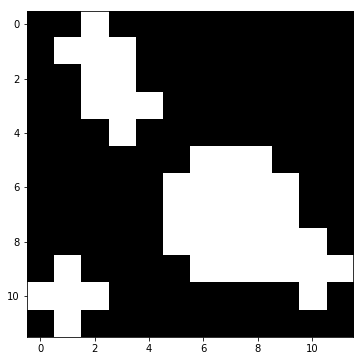

In [52]:
plt.imshow(paddedDilatedIm)

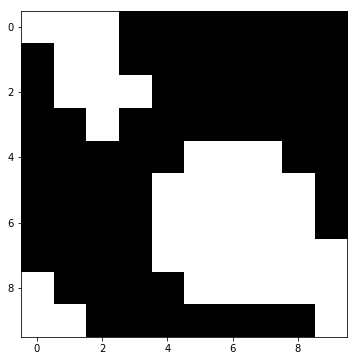

In [95]:
# Display final image (cropped)
finalDilated = paddedDilatedIm[border:border+height,
                               border:border+width]
plt.imshow(finalDilated)
plt.show()

# <font style="color:rgb(50,120,229)">Implement Erosion </font>

## <font style="color:rgb(50,120,229)">Check the correct output using cv2.erode </font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


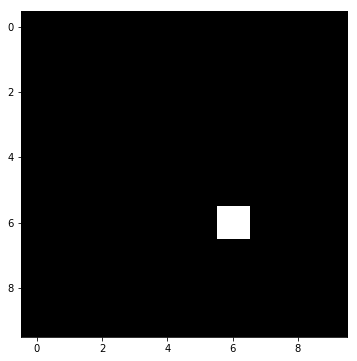

In [96]:
ErodedEllipseKernel = cv2.erode(im, element)
print(ErodedEllipseKernel)
plt.imshow(ErodedEllipseKernel);

## <font style="color:rgb(50,120,229)">Write code for Erosion from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`erosionScratch.avi`** and display it using markdown below:

**`erosionScratch.avi` will come here**

```<video width="320" height="240" controls>
  <source src="erosionScratch.avi" type="video/mp4">
</video>```

**Note**

1. Use FPS as 10
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

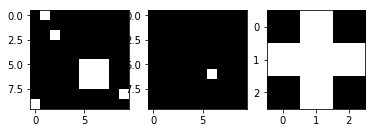

In [103]:
plt.subplot(131);plt.imshow(im)
plt.subplot(132);plt.imshow(ErodedEllipseKernel)
plt.subplot(133);plt.imshow(element)

In [97]:
border = ksize//2
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 1)
paddedErodedIm = paddedIm.copy()
# Create a VideoWriter object
###
### YOUR CODE HERE
###
for h_i in range(border, height+border):
    for w_i in range(border,width+border):
        ###
        ### YOUR CODE HERE
        ###
        # Resize output to 50x50 before writing it to the video
        ###
        ### YOUR CODE HERE
        ###
        # Convert resizedFrame to BGR before writing
        ###
        ### YOUR CODE HERE
        ###
# Release the VideoWriter object
###
### YOUR CODE HERE
###


SyntaxError: unexpected EOF while parsing (<ipython-input-97-2b35612c9844>, line 25)

In [ ]:
# Display final image (cropped)
###
### YOUR CODE HERE
###
